### **<h1 align="center">Prediction Eligibilité à un Crédit</h1>**

## Global variables

In [1]:
# ANSI escape codes for colored output
GREEN = "\033[92m"
BLUE = "\033[94m"
RESET = "\033[0m"

## Import CSV to dataframe

First of all, let's import the data stored in a CSV inside of a dataframe.

I'm also doing most (not all) of the imports necesarry for the script present in this notebook in order to limit duplicates.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importation des données du csv dans un dataframe
insurance_data_df = pd.read_csv("insurance_raw.csv")

## Initial Data Exploration

Although I'm now using a VSCode extension called 'Data Wrangler' to better explore the data, there are still a few graphs that are interesting to see using good old Python code.

Besides I'm also tasked with exploring the data this way so here it goes:

### Dataframe Statistics

Here I display some statistics about the dataframe. (Shape, Column types and Missing data)

#### Shape

In [3]:
insurance_data_df.shape

(1338, 7)

#### Column Types

In [4]:
insurance_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Missing data

In [5]:
insurance_data_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Distribution Graphs

Here I display distributions of numerical and categorical columns in the dataset.

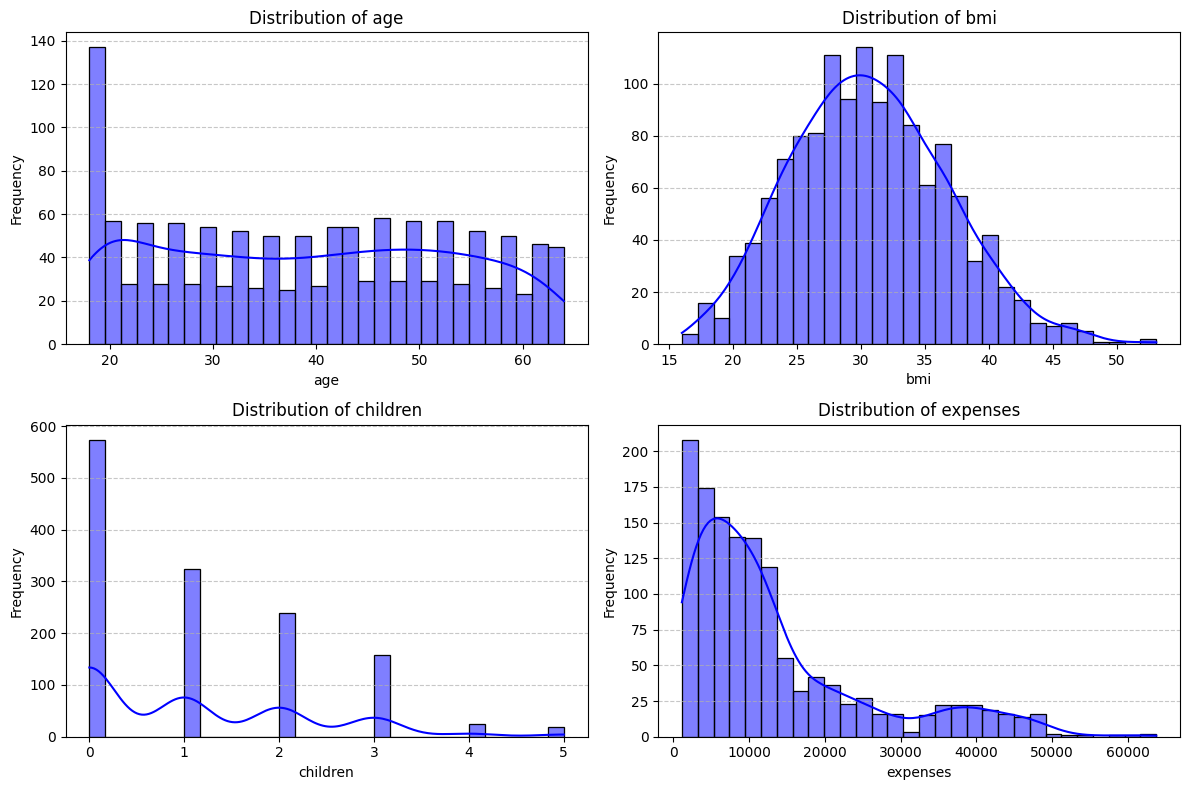

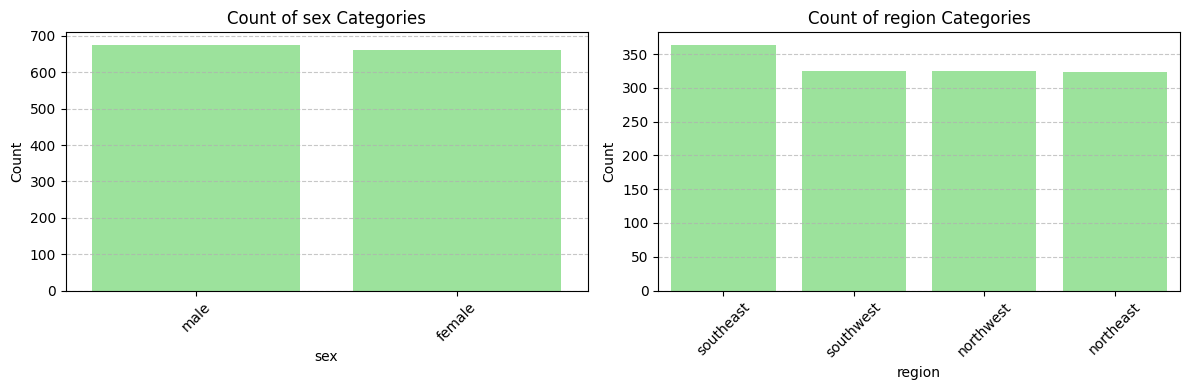

In [6]:
import math

# Afficher les distributions des variables numériques
def display_numerical_distribution(df, numerical_columns, grid_width=3, color="blue"):
    """
    Display the distribution of numerical columns in the dataframe in a grid layout.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - numerical_columns (list): List of numerical columns to plot.
    - grid_width (int): Maximum number of plots per row in the grid.
    - color (str): Color of the histogram bars.

    Returns:
    - None: Displays the plots directly.
    """
    num_columns = len(numerical_columns)
    num_rows = math.ceil(num_columns / grid_width)

    fig, axes = plt.subplots(num_rows, grid_width, figsize=(grid_width * 6, num_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.histplot(
            df[column].dropna(), 
            bins=30, 
            kde=True, 
            color=color, 
            ax=axes[i]
        )
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Afficher les distributions des variables catégorielles
def display_categorical_distribution(df, categorical_columns, grid_width=3, color="blue"):
    """
    Display the distribution of categorical columns in the dataframe in a grid layout.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - categorical_columns (list): List of categorical columns to plot.
    - grid_width (int): Maximum number of plots per row in the grid.
    - color (str): Color of the bars.

    Returns:
    - None: Displays the plots directly.
    """
    num_columns = len(categorical_columns)
    num_rows = math.ceil(num_columns / grid_width)

    fig, axes = plt.subplots(num_rows, grid_width, figsize=(grid_width * 6, num_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        # Prepare data for plotting
        category_counts = df[column].value_counts(dropna=False)
        sns.barplot(
            x=category_counts.index,
            y=category_counts.values,
            ax=axes[i],
            color=color
        )
        axes[i].set_title(f'Count of {column} Categories')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Visualisation des colonnes numériques
numerical_columns = ['age', 'bmi', 'children', 'expenses']
display_numerical_distribution(insurance_data_df, numerical_columns, grid_width=2, color="blue")

# Visualisation des variables catégoriques, y compris la cible
categorical_columns = ['sex', 'region']
display_categorical_distribution(insurance_data_df, categorical_columns, grid_width=2, color="lightgreen")

### Missing Value Heatmap

Here I display a heatmap of the missing values in the dataset.

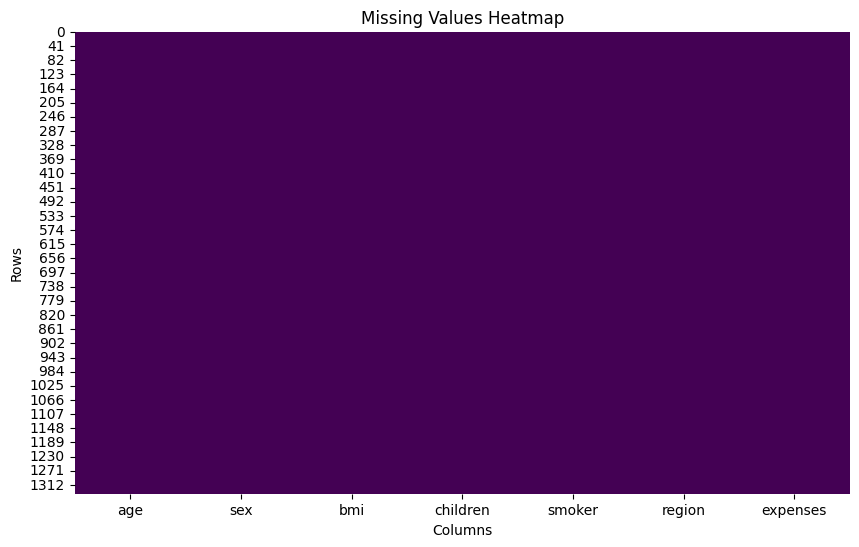

In [7]:
def plot_missing_values(dataframe):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

plot_missing_values(insurance_data_df)

### Correlation Matrix

Here I display a heatmap of the correlation matrix for all numeric columns in the dataset.

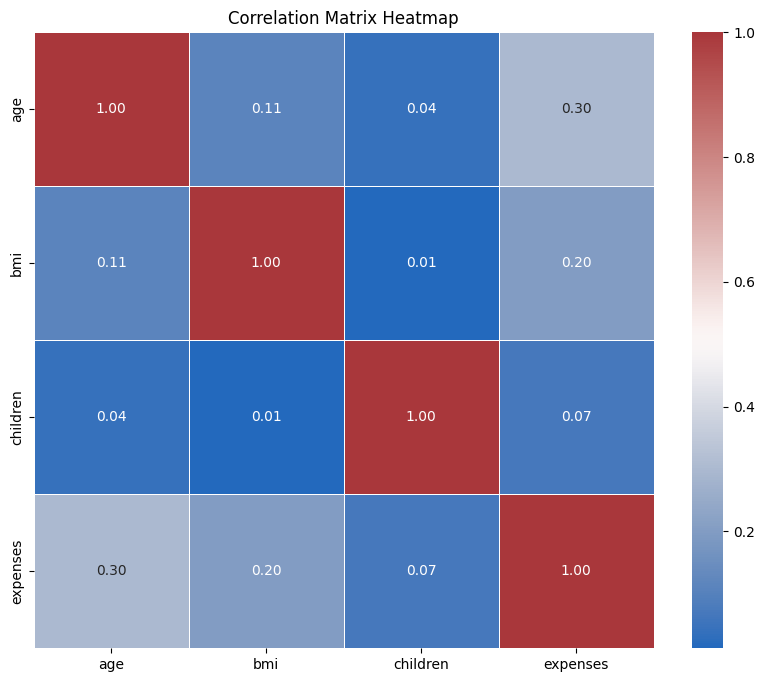

In [8]:
def display_correlation_matrix(dataframe):
    """
    Displays a heatmap of the correlation matrix for all numeric columns in the dataframe.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.

    Returns:
    - None: Displays the heatmap directly.
    """
    # Select only numeric columns
    numeric_dataframe = dataframe.select_dtypes(include=['number'])

    if numeric_dataframe.empty:
        print("No numeric columns found in the dataframe.")
        return

    # Calculate and display the correlation matrix
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_dataframe.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


# Display correlation matrix heatmap
display_correlation_matrix(insurance_data_df)

### Correlation to Target Variable

Here I display a bar plot of correlations between all numeric columns and the target variable.

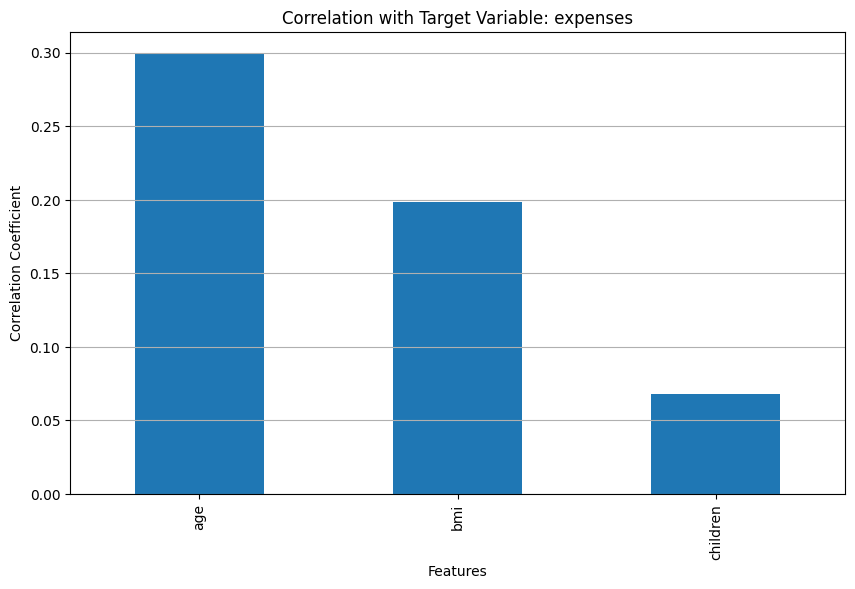

In [9]:
def display_correlations_with_target(dataframe, target_column):
    """
    Displays a bar plot of correlations between all numeric columns and the target variable.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - target_column (str): The target column to calculate correlations with.

    Returns:
    - None: Displays the bar plot directly.
    """
    if target_column not in dataframe.columns:
        print(f"Target column '{target_column}' not found in the dataframe.")
        return

    # Encode the target column if it is non-numeric
    if not pd.api.types.is_numeric_dtype(dataframe[target_column]):
        dataframe = dataframe.copy()  # Avoid modifying the original dataframe
        target_mapping = {'Y': 1, 'N': 0}  # Inverted encoding
        dataframe[target_column] = dataframe[target_column].map(target_mapping)
        print(f"Target column '{target_column}' encoded as: {target_mapping}")

    # Select numeric columns
    numeric_dataframe = dataframe.select_dtypes(include=['number'])

    if target_column not in numeric_dataframe.columns:
        print(f"Target column '{target_column}' could not be converted to numeric.")
        return

    # Calculate correlations with the target column
    correlations = numeric_dataframe.corr()[target_column].drop(target_column)

    # Plot the correlations
    plt.figure(figsize=(10, 6))
    correlations.sort_values(ascending=False).plot(kind='bar')
    plt.title(f"Correlation with Target Variable: {target_column}")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Features")
    plt.grid(axis='y')
    plt.show()


# Display correlations with target variable 'Loan_Status'
display_correlations_with_target(insurance_data_df, target_column="expenses")

### Outliers Graphs

Here I created functions to display boxplots and violin plots for potential outliers in the dataset.

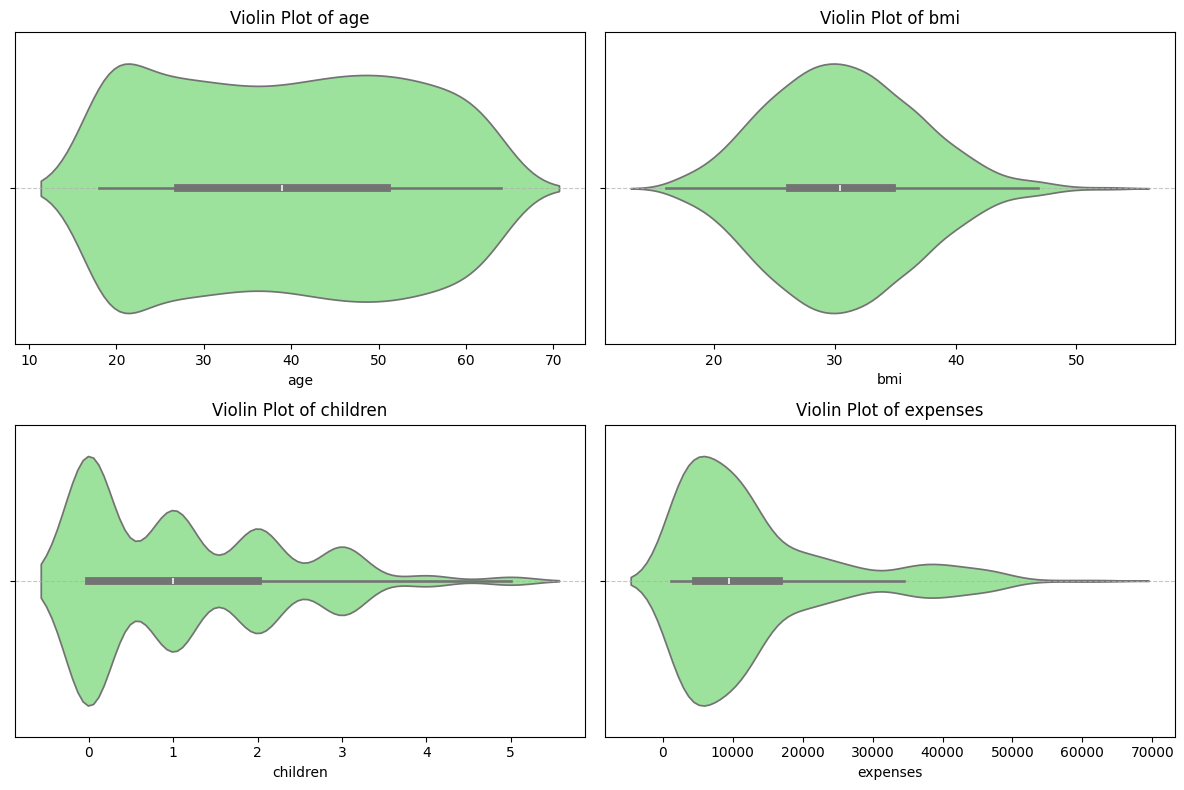

In [10]:
def display_outliers(dataframe, selected_columns, grid_width=3, color="blue"):
    """
    Displays boxplots for the selected columns to visualize potential outliers in a grid layout.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - selected_columns (list): List of columns to display outliers.
    - grid_width (int): Maximum number of plots per row in the grid.
    - color (str): Color for the boxplots.

    Returns:
    - None: Displays the graphs directly.
    """
    numeric_columns = [col for col in selected_columns if pd.api.types.is_numeric_dtype(dataframe[col])]
    num_columns = len(numeric_columns)
    num_rows = math.ceil(num_columns / grid_width)

    fig, axes = plt.subplots(num_rows, grid_width, figsize=(grid_width * 6, num_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        sns.boxplot(ax=axes[i], y=dataframe[column], color=color)
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_ylabel(column)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def display_outliers_violin(dataframe, selected_columns, grid_width=3, color="blue"):
    """
    Displays horizontal violin plots for the selected columns to visualize potential outliers in a grid layout.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - selected_columns (list): List of columns to display outliers.
    - grid_width (int): Maximum number of plots per row in the grid.
    - color (str): Color for the violin plots.

    Returns:
    - None: Displays the graphs directly.
    """
    numeric_columns = [col for col in selected_columns if pd.api.types.is_numeric_dtype(dataframe[col])]
    num_columns = len(numeric_columns)
    num_rows = math.ceil(num_columns / grid_width)

    fig, axes = plt.subplots(num_rows, grid_width, figsize=(grid_width * 6, num_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        sns.violinplot(data=dataframe, x=column, color=color, ax=axes[i])
        axes[i].set_title(f"Violin Plot of {column}")
        axes[i].set_xlabel(column)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Visualize outliers
# display_outliers(insurance_data_df, numerical_columns, grid_width=2, color="lightblue")
display_outliers_violin(insurance_data_df, numerical_columns, grid_width=2, color="lightgreen")

## Data preprocessing

### Duplicates Handling

Here I'm defining functions to handle duplicates in the dataset. (in this case I just delete them)

In [11]:
def find_duplicates(dataframe, selected_columns=[]):
    """
    Finds duplicates in the given dataframe based on selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to search for duplicates.
    - selected_columns (list): The columns to check for duplicates. If empty, all columns are used.

    Returns:
    - int: Number of duplicate rows found.
    """
    if not selected_columns:
        selected_columns = dataframe.columns
    
    duplicates = dataframe.duplicated(subset=selected_columns)
    return duplicates.sum()

def drop_duplicates(dataframe, selected_columns=[], keep='first'):
    """
    Drops duplicate rows in the dataframe based on selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe from which to remove duplicates.
    - selected_columns (list): The columns to check for duplicates. If empty, all columns are used.
    - keep (str): Which duplicates to keep ('first', 'last', or False).

    Returns:
    - pd.DataFrame: A dataframe with duplicates removed.
    """
    if not selected_columns:
        selected_columns = dataframe.columns

    return dataframe.drop_duplicates(subset=selected_columns, keep=keep)

# Find duplicates
num_duplicates = find_duplicates(insurance_data_df, selected_columns=[])
print(f"Number of duplicates: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    insurance_data_df_cleaned = drop_duplicates(insurance_data_df, keep='first')  # Keep the first occurrence
    print("Duplicates removed.")
else:
    insurance_data_df_cleaned = insurance_data_df

insurance_data_df_cleaned.describe()

Number of duplicates: 1
Duplicates removed.


,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


### Handling Missing Values

#### Functions

Here I created some functions to handle missing data.

No need for this dataset.

In [12]:
def fill_missing_with_knn(dataframe, selected_columns, n_neighbors=5):
    """
    Fills missing values in selected columns using K-Nearest Neighbors (KNN).

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be imputed.
    - n_neighbors (int): Number of neighbors to use for KNN imputation.

    Returns:
    - pd.DataFrame: A dataframe with missing values imputed using KNN.
    """
    # Ensure selected columns are numeric
    numeric_columns = []
    for col in selected_columns:
        if not pd.api.types.is_numeric_dtype(dataframe[col]):
            try:
                dataframe[col] = pd.to_numeric(dataframe[col], errors="coerce")
            except Exception as e:
                print(f"Error converting column {col} to numeric: {e}")
        numeric_columns.append(col)

    # Apply KNN imputation
    imputer = KNNImputer(n_neighbors=n_neighbors)
    dataframe[numeric_columns] = imputer.fit_transform(dataframe[numeric_columns])

    return dataframe


def split_dataframe_on_missing_target(dataframe, target_column):
    """
    Splits a dataframe into two based on missing values in the target column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to split.
    - target_column (str): The column to check for missing values.

    Returns:
    - pd.DataFrame: A dataframe containing rows where the target_column has no missing values.
    - pd.DataFrame: A dataframe containing rows where the target_column has missing values.
    """
    # Create a mask for rows with missing values in the target column
    missing_target_df = dataframe[dataframe[target_column].isnull()]
    
    # Create a dataframe without missing values in the target column
    cleaned_df = dataframe.dropna(subset=[target_column])
    
    return cleaned_df, missing_target_df


def fill_missing_with_value(dataframe, selected_columns, value):
    """
    Fills missing values in selected columns with the given value.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.
    - value: The value to replace missing data with.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced.
    """
    dataframe[selected_columns] = dataframe[selected_columns].fillna(value)
    return dataframe

def fill_missing_with_mean(dataframe, selected_columns):
    """
    Fills missing values in selected columns with the mean of each column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced by column mean.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            dataframe[column] = dataframe[column].fillna(dataframe[column].mean())
    return dataframe

def fill_missing_with_median(dataframe, selected_columns):
    """
    Fills missing values in selected columns with the median of each column.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where missing values will be replaced.

    Returns:
    - pd.DataFrame: DataFrame with missing values replaced by column median.
    """
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            dataframe[column] = dataframe[column].fillna(dataframe[column].median())
    return dataframe

def drop_rows_with_missing(dataframe, selected_columns):
    """
    Drops rows with missing values in the selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns to check for missing values.

    Returns:
    - pd.DataFrame: DataFrame with rows containing missing values removed.
    """
    return dataframe.dropna(subset=selected_columns)

# Do not use, not useful in this case
def drop_columns_with_missing(dataframe, selected_columns=None):
    """
    Drops columns with missing values. If selected_columns is None, checks all columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list or None): Columns to check for missing values. If None, checks all columns.

    Returns:
    - pd.DataFrame: DataFrame with columns containing missing values removed.
    """
    if selected_columns is None:
        return dataframe.dropna(axis=1)
    else:
        return dataframe.drop(columns=[col for col in selected_columns if dataframe[col].isnull().any()])

#### Applying functions to this dataframe

No need in this dataset.

### Outliers

#### Functions

These are function that I might use to handle outliers.

I'm probably going to use some of them, but not all.

In [13]:
def remove_outliers_iqr(dataframe, selected_columns):
    """
    Removes rows containing outliers based on the IQR method for the selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be removed.

    Returns:
    - pd.DataFrame: A dataframe with outliers removed.
    """
    df_cleaned = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):
            q1 = df_cleaned[column].quantile(0.25)
            q3 = df_cleaned[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned


def cap_outliers(dataframe, selected_columns, method="iqr"):
    """
    Caps outliers to the lower and upper bounds based on the chosen method.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be capped.
    - method (str): Method to calculate bounds ("iqr" or "zscore").

    Returns:
    - pd.DataFrame: A dataframe with capped outliers.
    """
    df_capped = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_capped[column]):
            if method == "iqr":
                q1 = df_capped[column].quantile(0.25)
                q3 = df_capped[column].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
            elif method == "zscore":
                mean = df_capped[column].mean()
                std = df_capped[column].std()
                lower_bound = mean - 3 * std
                upper_bound = mean + 3 * std
            else:
                raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")
            
            df_capped[column] = np.clip(df_capped[column], lower_bound, upper_bound)
    return df_capped


def replace_outliers_with_median(dataframe, selected_columns):
    """
    Replaces outliers in the selected columns with the column's median value.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to process.
    - selected_columns (list): Columns where outliers will be replaced.

    Returns:
    - pd.DataFrame: A dataframe with outliers replaced by median values.
    """
    df_replaced = dataframe.copy()
    for column in selected_columns:
        if pd.api.types.is_numeric_dtype(df_replaced[column]):
            q1 = df_replaced[column].quantile(0.25)
            q3 = df_replaced[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            median = df_replaced[column].median()
            df_replaced[column] = df_replaced[column].apply(
                lambda x: median if x < lower_bound or x > upper_bound else x
            )
    return df_replaced

#### Outliers handling

I don't see any outstanding outlier so I'm going to skip this step, at least for now !

In [14]:
# Remove outliers using IQR
#loan_data_df_cleaned = remove_outliers_iqr(loan_data_df_cleaned, selected_columns=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"])

#loan_data_df_cleaned = remove_outliers_iqr(loan_data_df_cleaned, selected_columns=["ApplicantIncome", "LoanAmount"])

Here I visualize what the data looks like after handling outliers.

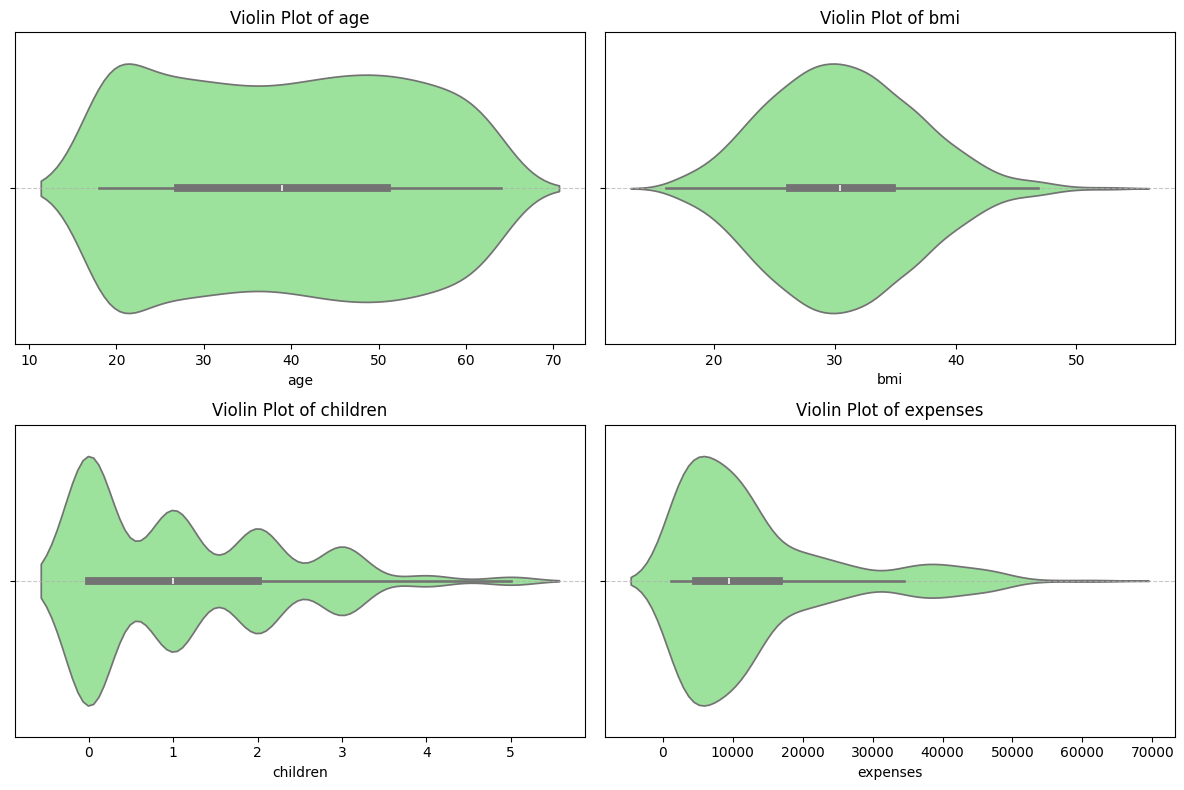

In [15]:
# Visualize outliers
display_outliers_violin(insurance_data_df_cleaned, selected_columns=numerical_columns, grid_width=2, color="lightgreen")

## Columns Selection for Model Training

For now I'm keeping all columns. But it might be a good idea to try using less in the future.

In [16]:
def filter_columns(dataframe, selected_columns):
    """
    Filters the dataframe to keep only the selected columns.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to filter.
    - selected_columns (list): List of column names to keep in the dataframe.

    Returns:
    - pd.DataFrame: A dataframe containing only the selected columns.
    """
    missing_columns = [col for col in selected_columns if col not in dataframe.columns]
    if missing_columns:
        raise ValueError(f"The following columns are not in the dataframe: {missing_columns}")

    return dataframe[selected_columns]

# Specify the columns to keep (all but 'Loan_ID' for now)
selected_columns = ["age",
                    "sex",
                    "bmi",
                    "children",
                    "smoker",
                    "region",
                    "expenses"]

# Filter the dataframe
filtered_df = filter_columns(insurance_data_df_cleaned, selected_columns)

## Encoding

### Encode using various methods

Encoding all categorical columns using different methods.

In [17]:
def encode_categorical_columns(dataframe):
    """
    Encodes categorical columns based on predefined rules.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe containing the categorical columns.

    Returns:
    - pd.DataFrame: The dataframe with encoded categorical columns.
    """
    # Ensure we are working on a copy to avoid modifying the original dataframe
    dataframe = dataframe.copy()

    # Encode 'sex' (0: female, 1: male)
    dataframe['sex'] = dataframe['sex'].map({'female': 0, 'male': 1}).fillna(-1).astype(int)

    # Encode 'smoker' (0: No, 1: Yes)
    dataframe['smoker'] = dataframe['smoker'].map({'no': 0, 'yes': 1}).fillna(-1).astype(int)

    # One-Hot Encode 'region'
    dataframe = pd.get_dummies(dataframe, columns=['region'], drop_first=False)
    
    # Convert all one-hot encoded columns to int
    region_columns = [col for col in dataframe.columns if col.startswith('region_')]
    dataframe[region_columns] = dataframe[region_columns].astype(int)

    return dataframe

# Encode categorical columns
encoded_df = encode_categorical_columns(filtered_df)

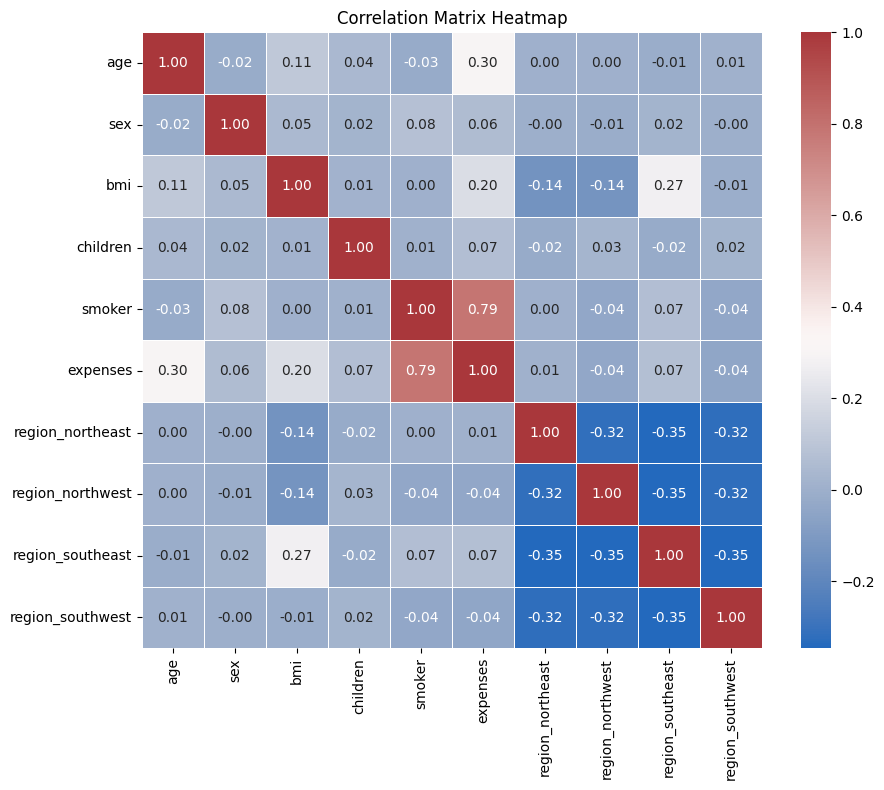

In [18]:
# Display correlation matrix heatmap
display_correlation_matrix(encoded_df)

### Change column Types

No need in this case.

In [19]:
def change_column_types(dataframe):
    """
    Changes the data types of specific columns in the dataframe.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe whose columns need type changes.

    Returns:
    - pd.DataFrame: The dataframe with updated column types.
    """
    # Define the desired data types for each column
    column_types = {
        "Gender": "int64",
        "Married": "int64",
        "Dependents": "float64",
        "Education": "int64",
        "Self_Employed": "int64",
        "Credit_History": "int64",
        "Loan_Status": "int64",
        "ApplicantIncome": "float64",
    }

    # Change column types
    for column, dtype in column_types.items():
        if column in dataframe.columns:
            dataframe[column] = dataframe[column].astype(dtype)
        else:
            print(f"Warning: Column '{column}' not found in the dataframe.")
    
    return dataframe

# Convert columns to the desired types
# encoded_df = change_column_types(encoded_df)

# encoded_df.info()

## Train/Test Split

### Split

Splitting training and testing sets.

In [20]:
def split_dataset(dataframe, split_percentage=0.8):
    """
    Splits a dataframe into training and testing datasets.

    Parameters:
    - dataframe (pd.DataFrame): The dataframe to split.
    - split_percentage (float): The proportion of the dataset to include in the training set.

    Returns:
    - pd.DataFrame: Training dataset.
    - pd.DataFrame: Testing dataset.
    """
    if not (0 < split_percentage < 1):
        raise ValueError("split_percentage must be a float between 0 and 1.")

    train_df, test_df = train_test_split(dataframe, test_size=1-split_percentage, random_state=42)
    return train_df, test_df

train_df, test_df = split_dataset(encoded_df, split_percentage=0.8)

### Handle Target Variable Distribution

No need with a regression model.

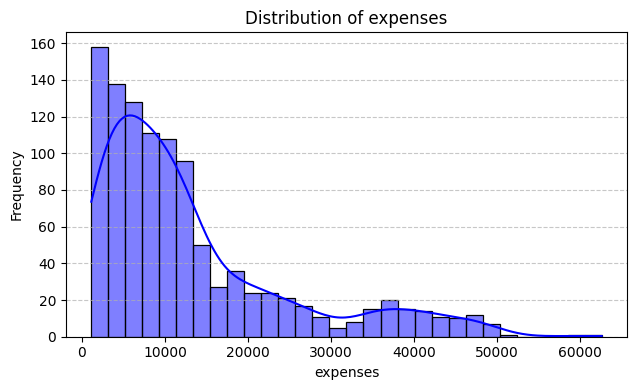

In [21]:
display_numerical_distribution(train_df, ["expenses"])

### Split X/y

Here I separate the features and the target variable.

In [22]:
def create_train_test_sets(train_df, test_df, target_variable):
    """
    Splits the training and testing dataframes into features (X) and target (y) sets.

    Parameters:
    - train_df (pd.DataFrame): The training dataframe.
    - test_df (pd.DataFrame): The testing dataframe.
    - target_variable (str): The target variable column name.

    Returns:
    - X_train (pd.DataFrame): Features for training.
    - X_test (pd.DataFrame): Features for testing.
    - y_train (pd.Series): Target for training.
    - y_test (pd.Series): Target for testing.
    """
    X_train = train_df.drop(columns=[target_variable])
    y_train = train_df[target_variable]
    X_test = test_df.drop(columns=[target_variable])
    y_test = test_df[target_variable]
    
    return X_train, X_test, y_train, y_test

target_variable = "expenses"
X_train, X_test, y_train, y_test = create_train_test_sets(train_df, test_df, target_variable)

## Standardization / Normalisation

Since I'm going to try a few different models, I'm choosing to just standardize the values instead of normalizing them. (for compatibility with all models)
I might change that in the future based on which model I end up using.

In [23]:
X_train.describe()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,39.198316,0.514500,30.542470,1.084191,0.200187,0.236670,0.246960,0.268475,0.247895
std,13.998594,0.500024,6.051032,1.194723,0.400328,0.425237,0.431445,0.443374,0.431993
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.400000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
def standardize_columns(X_train, X_test, columns_to_standardize):
    """
    Standardizes specified columns in X_train and X_test.

    Parameters:
    - X_train (pd.DataFrame): Training data.
    - X_test (pd.DataFrame): Testing data.
    - columns_to_standardize (list): List of columns to standardize.

    Returns:
    - X_train (pd.DataFrame): Training data with standardized columns.
    - X_test (pd.DataFrame): Testing data with standardized columns.
    """
    # Create a scaler instance
    scaler = StandardScaler()

    # Fit scaler on the training set and transform both train and test sets
    X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
    X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

    return X_train, X_test

# Specify numeric columns to standardize
columns_to_standardize = ["age", "bmi", 'children']

# Standardize specified columns in X_train and X_test
X_train, X_test = standardize_columns(X_train, X_test, columns_to_standardize)

In [25]:
X_train.describe()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1.069000e+03,1069.000000,1.069000e+03,1.069000e+03,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,1.678317e-16,0.514500,-2.741804e-16,5.068184e-17,0.200187,0.236670,0.246960,0.268475,0.247895
std,1.000468e+00,0.500024,1.000468e+00,1.000468e+00,0.400328,0.425237,0.431445,0.443374,0.431993
min,-1.515026e+00,0.000000,-2.404429e+00,-9.079080e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.718037e-01,0.000000,-7.179770e-01,-9.079080e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.417350e-02,1.000000,-5.662338e-02,-7.050192e-02,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.434567e-01,1.000000,6.377979e-01,7.669042e-01,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.772556e+00,1.000000,3.729626e+00,3.279123e+00,1.000000,1.000000,1.000000,1.000000,1.000000


Here I'm displaying violin plots to visualize what the training and testing data look like after standardization.

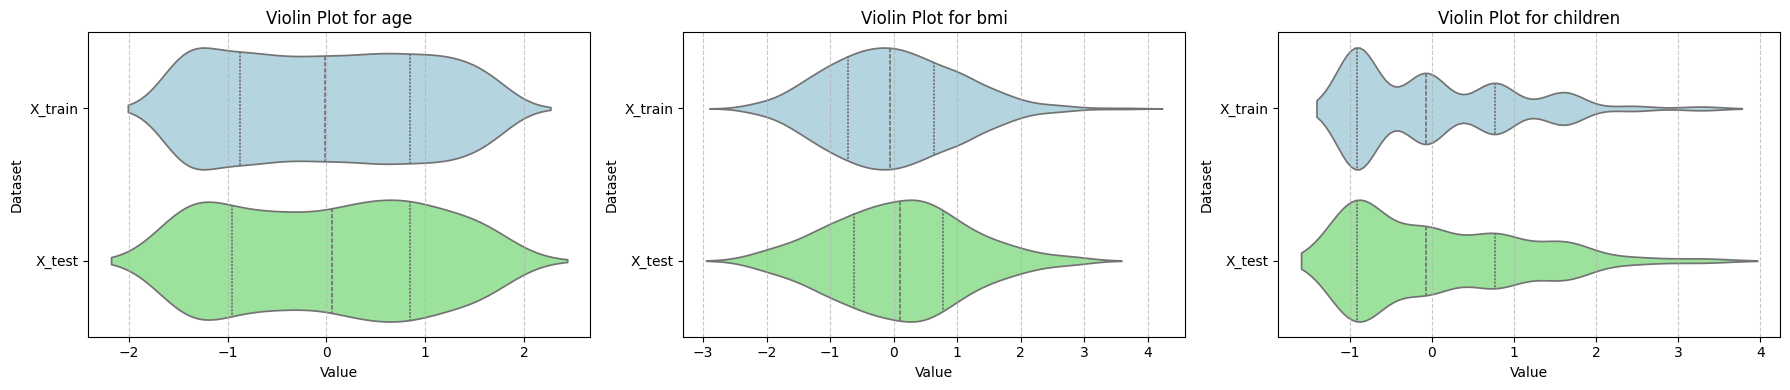

In [26]:
import math

def visualize_violin_plots(X_train, X_test, columns_to_visualize, grid_width=3, color1="blue", color2="orange"):
    """
    Visualizes horizontal violin plots for the specified columns in X_train and X_test in a grid layout.

    Parameters:
    - X_train (pd.DataFrame): Training data.
    - X_test (pd.DataFrame): Testing data.
    - columns_to_visualize (list): List of columns to visualize.
    - grid_width (int): Maximum number of plots per row in the grid.
    - color1 (str): Color for X_train plots.
    - color2 (str): Color for X_test plots.

    Returns:
    - None: Displays violin plots for each specified column in a grid layout.
    """
    num_columns = len(columns_to_visualize)
    num_rows = math.ceil(num_columns / grid_width)

    # Set up the grid
    fig, axes = plt.subplots(num_rows, grid_width, figsize=(grid_width * 6, num_rows * 4), squeeze=False)
    axes = axes.flatten()

    for i, column in enumerate(columns_to_visualize):
        # Combine train and test data for a shared violin plot
        combined_data = (
            pd.concat([
                X_train[column].to_frame().assign(Set="X_train"),
                X_test[column].to_frame().assign(Set="X_test")
            ])
            .rename(columns={column: "Value"})
        )

        # Plot horizontal violin plot with hue and legend disabled
        sns.violinplot(
            ax=axes[i],
            x="Value",
            y="Set",
            data=combined_data,
            hue="Set",
            palette={ "X_train": color1, "X_test": color2 },
            density_norm="width",
            inner="quartile",
            legend=False
        )
        axes[i].set_title(f"Violin Plot for {column}")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Dataset")
        axes[i].grid(axis="x", linestyle="--", alpha=0.7)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Visualize violin plots for specified columns
visualize_violin_plots(X_train, X_test, columns_to_visualize=columns_to_standardize, grid_width=3, color1="lightblue", color2="lightgreen")

## Model choice

### List of Models

This is the list of models I'm going to test on this dataset.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# List of models
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('DecisionTree', DecisionTreeRegressor()),
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('KNeighbors', KNeighborsRegressor()),
    # ('MLPRegressor', MLPRegressor())
]

### GridSearch

I'm training and evaluating the models to find which one is the most adequate for this task.

Although I'm calculating the Accuracy, F-1 score and Precision, I'm evaluating the models based on the Precision score alone. (sice we're trying to minimize false positives in this case)

#### List of Models and Parameters for GridSearch

In [28]:
# List of parameter grids for each model
param_grids = [
    # Linear Regression
    {
        'fit_intercept': [True, False],
        'n_jobs': [-1]
    },
    # Ridge Regression
    {
        'alpha': [0.1, 1.0, 10.0, 100.0],
        'solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'sag', 'saga']
    },
    # Lasso Regression
    {
        'alpha': [0.01, 0.1, 1.0, 10.0],
        'max_iter': [1000, 2000, 5000]
    },
    # Decision Tree Regressor
    {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    # Random Forest Regressor
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'n_jobs': [-1],
        'verbose': [0]
    },
    # Gradient Boosting Regressor
    {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'verbose': [0]
    },
    # Support Vector Regressor (SVR)
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'epsilon': [0.1, 0.2, 0.5]
    },
    # KNeighbors Regressor
    {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    # MLP Regressor
    {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [1000, 2000],
        'verbose': [False]
    }
]

#### GridSearch Function

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

def perform_gridsearch_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test, verbose=1):
    """
    Performs GridSearchCV for multiple models, evaluates metrics, and stores results in a DataFrame.

    Parameters:
    - models (list): List of tuples with model name and model instance (e.g., [('Ridge', Ridge()), ...]).
    - param_grids (list): List of parameter grids corresponding to each model.
    - X_train (pd.DataFrame): Training feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - X_test (pd.DataFrame): Test feature set.
    - y_test (pd.Series or np.array): Test target variable.
    - verbose (int): Verbosity level for GridSearchCV.

    Returns:
    - results_df (pd.DataFrame): DataFrame containing evaluation metrics for all models.
    - best_model (dict): Dictionary with the name, parameters, and GridSearchCV object of the best model based on MAPE.
    """
    # Initialize a DataFrame to store results
    results = []
    
    # Checks for NaN or infinite values
    X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
    X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Iterate over models and their parameter grids
    for model_name, model in models:
        print(f"\nRunning GridSearch for {GREEN}{model_name}{RESET}...")
        grid = GridSearchCV(
            estimator=model, 
            param_grid=param_grids[models.index((model_name, model))], 
            cv=5, 
            n_jobs=-1, 
            verbose=verbose
        )
        
        # Fit the GridSearchCV
        grid.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = grid.best_estimator_.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)  # Default MSE
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        # Store the results
        results.append({
            'Model': model_name,
            'Best Parameters': grid.best_params_,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2,
            'MAPE': mape,
            'Best Score (GridSearchCV)': grid.best_score_
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Identify the best model based on MAPE
    best_model_row = results_df.loc[results_df['MAPE'].idxmin()]
    best_model = {
        'Model': best_model_row['Model'],
        'Best Parameters': best_model_row['Best Parameters'],
        'GridSearchCV Object': grid  # The last grid object corresponds to the best model
    }
    
    return results_df, best_model

# Run the function
results_df, best_model = perform_gridsearch_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test)

# Display the results
display(results_df)

# Print the best model
print(f"\n{BLUE}Best model based on MAPE: {GREEN}{best_model['Model']}{RESET}")
print(f"{BLUE}Best Parameters:{RESET} {best_model['Best Parameters']}")


Running GridSearch for LinearRegression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Running GridSearch for Ridge...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Running GridSearch for Lasso...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Running GridSearch for DecisionTree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Running GridSearch for RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Utilisateur\Documents\GitHub Repos\Simplon\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Running GridSearch for SVR...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Running GridSearch for KNeighbors...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,Model,Best Parameters,MAE,MSE,RMSE,R²,MAPE,Best Score (GridSearchCV)
0,LinearRegression,"{'fit_intercept': True, 'n_jobs': -1}",4177.267596,3.548147e+07,5956.632572,0.806910,0.414070,0.725784
1,Ridge,"{'alpha': 1.0, 'solver': 'sparse_cg'}",4194.049552,3.566441e+07,5971.968779,0.805914,0.416535,0.725889
2,Lasso,"{'alpha': 10.0, 'max_iter': 1000}",4185.584469,3.564349e+07,5970.216840,0.806028,0.416001,0.725887
3,DecisionTree,"{'criterion': 'absolute_error', 'max_depth': 1...",1948.407146,2.136318e+07,4622.032093,0.883742,0.138686,0.819796
4,RandomForest,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",2385.399127,1.837877e+07,4287.046602,0.899983,0.299510,0.837858
5,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'min_sa...",2471.600462,1.807848e+07,4251.879795,0.901617,0.327893,0.844398
6,SVR,"{'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'k...",7018.307537,1.883579e+08,13724.353145,-0.025043,0.272546,-0.048721
7,KNeighbors,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",4119.158384,5.917966e+07,7692.831701,0.677944,0.393488,0.657146



Best model based on MAPE: DecisionTree
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


#### GridSearch Results Graphs

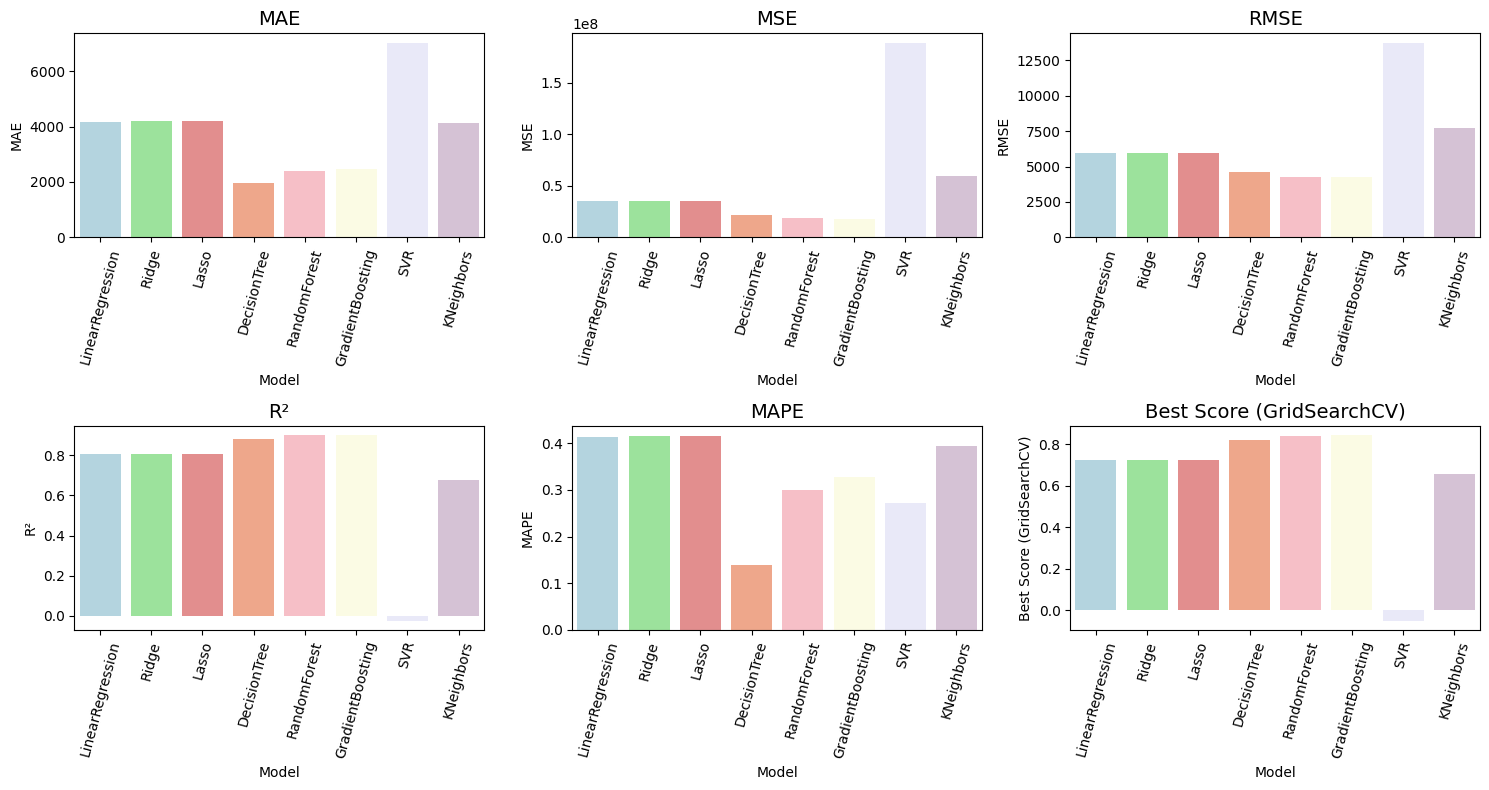

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_results_grid(results_df, selected_columns=None, grid_width=3, colors=None):
    """
    Displays the results of model evaluation using Seaborn graphs on a grid layout.

    Parameters:
    - results_df (pd.DataFrame): DataFrame containing evaluation metrics for each model.
    - selected_columns (list): List of numerical columns to plot. If empty, all numerical columns are used.
    - grid_width (int): Maximum number of graphs per row.
    - colors (list): List of colors to use for each model.
    """
    # Determine columns to plot
    if not selected_columns:
        selected_columns = results_df.select_dtypes(include=['number']).columns.tolist()

    # Calculate grid dimensions
    num_metrics = len(selected_columns)
    num_rows = math.ceil(num_metrics / grid_width)

    # Create a color palette dictionary mapping models to colors
    if colors is None or len(colors) != len(results_df):
        colors = sns.color_palette("tab10", len(results_df))
    palette_dict = dict(zip(results_df['Model'], colors))

    # Set up the figure
    fig, axes = plt.subplots(num_rows, grid_width, figsize=(5 * grid_width, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    # Plot each metric
    for i, metric in enumerate(selected_columns):
        ax = axes[i]
        sns.barplot(
            data=results_df,
            x='Model',
            y=metric,
            hue='Model',  # Assign hue to the Model column
            palette=palette_dict,  # Use the palette dictionary
            ax=ax,
            dodge=False  # Ensures single bar per model
        )
        ax.set_title(metric, fontsize=14)
        ax.set_ylabel(metric)
        ax.set_xlabel("Model")
        ax.tick_params(axis='x', rotation=75)

        # Remove legend if it exists
        legend = ax.get_legend()
        if legend:
            legend.remove()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# 9 distinct colors
colors = [
    'lightblue',     # Light blue
    'lightgreen',    # Light green
    'lightcoral',    # Light coral (reddish)
    'lightsalmon',   # Light salmon (orange-pink)
    'lightpink',     # Light pink
    'lightyellow',   # Light yellow
    # 'khaki',      # Light cyan
    'lavender',      # Lavender (light purple)
    'thistle'        # Thistle (soft lavender-gray)
]

plot_results_grid(
    results_df=results_df,
    selected_columns=[],
    grid_width=3,
    colors=colors
)

### RandomizedSearch

Same as GridSearch, I'm training and evaluating the models to find which one is the most adequate for this task.

And again, although I'm calculating the Accuracy, F-1 score and Precision, I'm evaluating the models based on the Precision score alone. (sice we're trying to minimize false positives in this case)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

def run_randomizedsearch_on_models(models, param_distributions, X_train, X_test, y_train, y_test, scoring='accuracy', n_iter=50, random_state=42):
    """
    Performs RandomizedSearchCV for multiple models, finds the best parameters, and evaluates each model.

    Parameters:
    - models (list): List of models to test.
    - param_distributions (list): List of parameter distributions corresponding to each model.
    - X_train (pd.DataFrame): Training data features.
    - X_test (pd.DataFrame): Testing data features.
    - y_train (pd.Series): Training data labels.
    - y_test (pd.Series): Testing data labels.
    - scoring (str): Metric to evaluate performance (default: 'accuracy').
    - n_iter (int): Number of parameter settings sampled (default: 50).
    - random_state (int): Random state for reproducibility.

    Returns:
    - dict: A dictionary with model names as keys and their best scores, parameters, and test scores.
    """
    results = {}
    
    for model, param_dist in zip(models, param_distributions):
        model_name = model.__class__.__name__
        print(f"\n\033[93mRunning RandomizedSearchCV for\033[0m \033[92m{model_name}\033[0m...")
        
        # Use accuracy, F1-score, and precision as scoring metrics
        scoring_metrics = {
            'accuracy': 'accuracy',
            'f1': make_scorer(f1_score, average='binary'),
            'precision': make_scorer(precision_score, average='binary', zero_division=0)  # Handle undefined precision
        }

        # Set up RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_dist,
            scoring=scoring_metrics,
            refit='precision',  # Use precision for selecting the best model
            n_iter=n_iter,
            cv=5,
            verbose=1,
            random_state=random_state
        )
        
        # Fit RandomizedSearchCV
        random_search.fit(X_train, y_train)
        
        # Get the best parameters and cross-validation scores
        best_params = random_search.best_params_
        best_cv_accuracy = random_search.cv_results_['mean_test_accuracy'][random_search.best_index_]
        best_cv_f1 = random_search.cv_results_['mean_test_f1'][random_search.best_index_]
        best_cv_precision = random_search.cv_results_['mean_test_precision'][random_search.best_index_]
        
        # Evaluate on the test set
        best_model = random_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)

        # Store results
        results[model_name] = {
            "Best Parameters": best_params,
            "Best CV Accuracy": best_cv_accuracy,
            "Best CV F1-Score": best_cv_f1,
            "Best CV Precision": best_cv_precision,
            "Test Set Accuracy": test_accuracy,
            "Test Set F1-Score": test_f1,
            "Test Set Precision": test_precision
        }
        
        print(f"\033[94mBest Parameters:\033[0m {best_params}")
        print(f"\033[94mBest CV Accuracy:\033[0m {best_cv_accuracy:.4f}")
        print(f"\033[94mBest CV F1-Score:\033[0m {best_cv_f1:.4f}")
        print(f"\033[94mBest CV Precision:\033[0m {best_cv_precision:.4f}")
        print(f"\033[94mTest Set Accuracy:\033[0m {test_accuracy:.4f}")
        print(f"\033[94mTest Set F1-Score:\033[0m {test_f1:.4f}")
        print(f"\033[92mPrecision:\033[0m {test_precision:.4f}\n")

        # Display confusion matrix
        plot_confusion_matrix(y_test, y_test_pred, model_name)
    
    # Find the best model based on test set Precision score
    best_model_name = max(results, key=lambda model: results[model]["Test Set Precision"])
    print(f"\n\033[94mBest Model:\033[0m \033[92m{best_model_name}\033[0m")
    print(f"\033[94mParameters:\033[0m {results[best_model_name]['Best Parameters']}")
    print(f"\033[94mTest Accuracy:\033[0m {results[best_model_name]['Test Set Accuracy']:.4f}")
    print(f"\033[94mTest F1-Score:\033[0m {results[best_model_name]['Test Set F1-Score']:.4f}")
    print(f"\033[92mPrecision:\033[0m {results[best_model_name]['Test Set Precision']:.4f}")
    
    return results

param_distributions = [
    # RandomForestClassifier
    {
        "n_estimators": randint(100, 500),
        "max_depth": [None, 10, 20],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5),
        "max_features": ["sqrt", "log2", None],
        "bootstrap": [True, False],
        "n_jobs": [-1],
        "verbose": [0]
    },
    
    # LogisticRegression
    {
        "penalty": ["l1", "l2", "elasticnet"],
        "C": uniform(0.01, 10),
        "solver": ["saga"],
        "l1_ratio": uniform(0.1, 0.9),
        "max_iter": randint(100, 1000)
    },
    
    # SVC
    {
        "C": uniform(0.1, 10),
        "kernel": ["linear", "rbf", "poly", "sigmoid"],
        "gamma": uniform(0.01, 1),
        "degree": randint(2, 5),
        "coef0": uniform(0.0, 1.0),
        "verbose": [False]
    },
    
    # KNeighborsClassifier
    {
        "n_neighbors": randint(3, 20),
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski", "chebyshev"],
        "p": randint(1, 3),
        "n_jobs": [-1]
    },
    
    # GradientBoostingClassifier
    {
        "n_estimators": randint(50, 300),
        "learning_rate": uniform(0.01, 0.3),
        "max_depth": randint(3, 10),
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5),
        "subsample": uniform(0.7, 1.0),
        "max_features": ["sqrt", "log2", None]
    },
    
    # HistGradientBoostingClassifier
    {
        "learning_rate": uniform(0.01, 0.3),
        "max_iter": randint(100, 500),
        "max_depth": [None, 10, 20],
        "l2_regularization": uniform(0.0, 1.0),
        "min_samples_leaf": randint(10, 50),
        "max_leaf_nodes": randint(31, 100),
        "verbose": [0]
    }
]

# random_search_results = run_randomizedsearch_on_models(models, param_distributions, X_train, X_test, y_train, y_test)

## Model training

Since this is just an exercise to understand the process, I'm not going to train any model independently. Training has been done in GridSearch and RandomizedSearch.

## Model Evaluation

Same as model training, evaluation has been done in GridSearch and RandomizedSearch.